In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st



In [2]:
# Read the mouse data and the study results
mouse_metadata=pd.read_csv("Mouse_metadata.csv")
study_results=pd.read_csv("Study_results.csv")

In [3]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results=pd.read_csv("Study_results.csv")

In [5]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


PREPARE THE DATA 

In [6]:
# Combine the data into a single DataFrame
mouse_study=pd.merge(study_results,mouse_metadata,how="left", on=["Mouse ID", "Mouse ID"])

In [7]:
# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
mouse_study.shape

(1893, 8)

In [9]:
# Checking the number of mice.
mouse_count=mouse_study['Mouse ID'].nunique()
mouse_count

249

In [10]:
#Get all the data for the duplicate mouse ID.
Mouse_id_duplicate=mouse_study[mouse_study.duplicated(['Mouse ID','Timepoint'],keep=False)]



In [11]:
#displaying the mouse ID duplicates
Mouse_id_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean=mouse_study[(mouse_study["Mouse ID"]!="g989")]

In [13]:
mouse_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
mouse_count=mouse_study_clean['Mouse ID'].nunique()
mouse_count

248

SUMMARY STATISTICS


In [15]:
mean_tumor_volume= mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
mean_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [16]:
median_tumor_volume=mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
median_tumor_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [17]:
variance_tumor_volume=mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
variance_tumor_volume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [18]:
sd_tumor_volume=mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sd_tumor_volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [19]:
se_tumor_volume=mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
se_tumor_volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [20]:
tumor_volume_summary = pd.DataFrame({
    "Mean Tumor Volume":mean_tumor_volume,"Median Tumor Volume":median_tumor_volume,"Tumor Volume Variance":variance_tumor_volume,
    "Tumor Volume Std.Dev.":sd_tumor_volume,"Tumor Volume Std.Err.":se_tumor_volume})

In [21]:
tumor_volume_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


BAR AND PIE CHARTS 

In [57]:
counts = mouse_study_clean['Drug Regimen'].value_counts()
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

In [58]:
counts.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

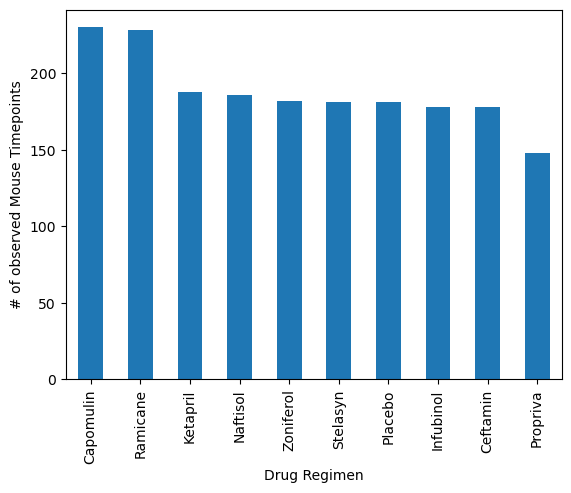

In [74]:
# Generate a bar Plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts_chart=counts.plot(kind='bar',legend=False)
counts_chart.set_ylabel('# of observed Mouse Timepoints')
plt.show()

In [60]:
x_axis=counts.index.values

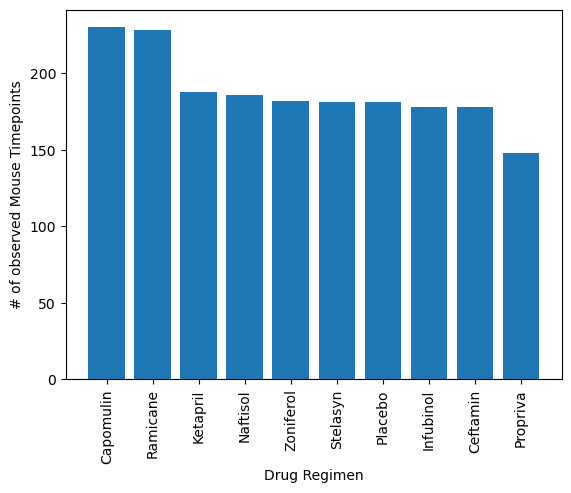

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pyplot.
plt.bar(x_axis,counts.values)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.show()

In [52]:
sex_counts=mouse_study_clean['Sex'].value_counts()
sex_counts


Sex
Male      958
Female    922
Name: count, dtype: int64

In [63]:
sex_counts.values

array([958, 922], dtype=int64)

In [64]:
sex_counts.index.values

array(['Male', 'Female'], dtype=object)

In [65]:
labels=['Male','Female']
sizes=[958,922]

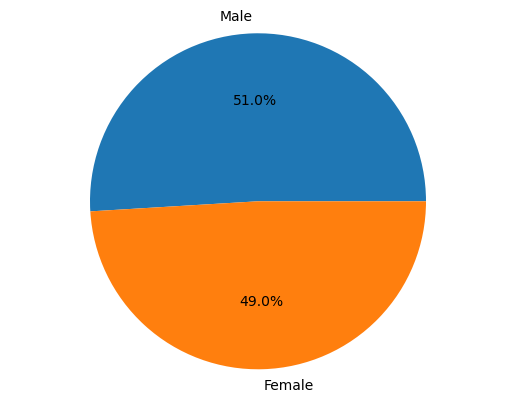

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=0)
plt.axis('equal')
plt.show()

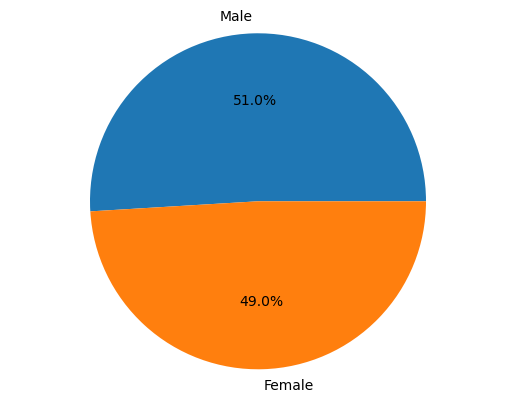

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts_chart=sex_counts.plot(kind='pie',label="",labels=sex_counts.index,autopct='%1.1f%%',startangle=0)
plt.axis('equal')
plt.show()


QUANTILES, OUTLIERS AND BOXPLOTS

In [215]:
# Start by getting the last (greatest) timepoint for each mouse
last_greatest_timepoint=mouse_study_clean.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_greatest_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [218]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume=pd.merge(last_greatest_timepoint,mouse_study_clean,on=['Mouse ID','Timepoint'],how='left')
final_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [220]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list=['Capomulin','Ramicane','Infubinol','Ceftamin']

In [221]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list=[]


In [222]:
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments_list:
    treatment_data=final_volume[final_volume['Drug Regimen']== treatment]
    tumor_volumes=treatment_data['Tumor Volume (mm3)'].tolist()
    tumor_volume_list.append(tumor_volumes)
    

In [223]:
print (tumor_volume_list)

[[38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384], [38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575], [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141], [62.99935619, 45.0, 56.05

In [233]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.


for treatment in treatments_list:
    treatments_data=final_volume[final_volume['Drug Regimen']== treatment]
    tumor_volume=treatments_data['Tumor Volume (mm3)']
    
    Q1=tumor_volume.quantile(0.25)
    Q3=tumor_volume.quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    outliers=tumor_volumes[(tumor_volume<lower_bound)|(tumor_volume>upper_bound)]
    





TypeError: list indices must be integers or slices, not Series

In [ ]:
LINE AND SCATTER PLOTS

In [235]:
#to view the mouse id's associated with capomulin
capomulin_data=final_volume[final_volume['Drug Regimen'] =='Capomulin']
capomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22
80,i557,45,47.685963,1,Capomulin,Female,1,24
83,i738,45,37.311846,2,Capomulin,Female,23,20
85,j119,45,38.125164,1,Capomulin,Female,7,23
87,j246,35,38.753265,1,Capomulin,Female,21,21
108,l509,45,41.483008,3,Capomulin,Male,17,21


In [238]:
mouse_id='s710'
drug='Capomulin'
mouse_data= final_volume[(final_volume['Mouse ID'] ==mouse_id) & (final_volume['Drug Regimen'] == drug)]



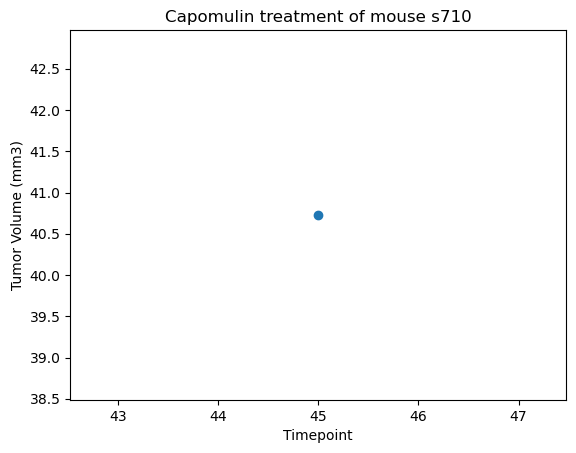

In [241]:
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'],marker='o')
plt.title(f'Capomulin treatment of mouse s710')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()